In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
data = pd.read_excel("Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True)
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<AxesSubplot:xlabel='Month'>

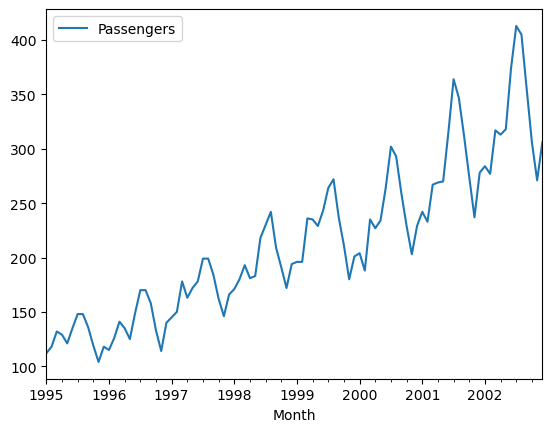

In [3]:
data.plot()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

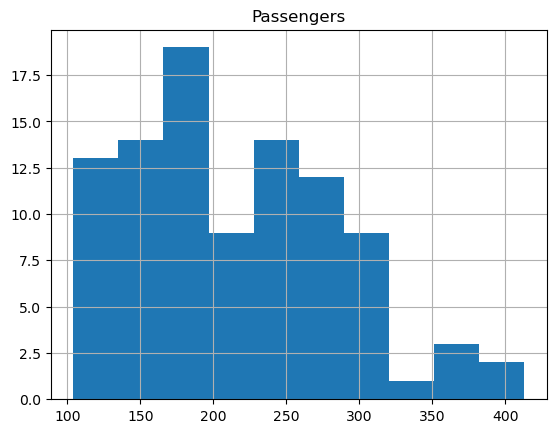

In [4]:
data.hist()

<AxesSubplot:ylabel='Density'>

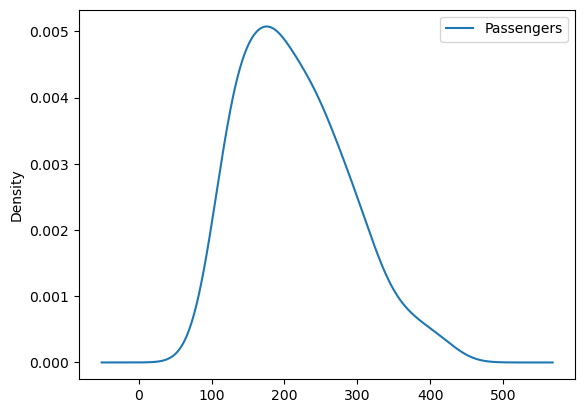

In [5]:
data.plot(kind='kde')

Sarima model

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

train = data.iloc[:80]
test = data.iloc[80:]

In [7]:
 model = SARIMAX(train['Passengers'], order=(1,1,1),seasonal_order=(1,1,1,12))
result = model.fit(disp=False)

forecast = result.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

rmse_sarima = sqrt(mean_squared_error(test['Passengers'], predicted_values))
print(f'Sarima RMSE: {rmse_sarima}')

Sarima RMSE: 15.052165717174361


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Arima model

In [8]:
from statsmodels.tsa.arima.model import ARIMA


model_arima = ARIMA(train['Passengers'], order=(1,1,1))
result_arima = model_arima.fit()


forecast_arima = result_arima.get_forecast(steps=len(test))
predicted_values_arima = forecast_arima.predicted_mean


rmse_arima = sqrt(mean_squared_error(test['Passengers'], predicted_values_arima))
print(f'Arima RMSE: {rmse_arima}')

Arima RMSE: 54.234009528266775


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Data Driven model

Moving Average

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

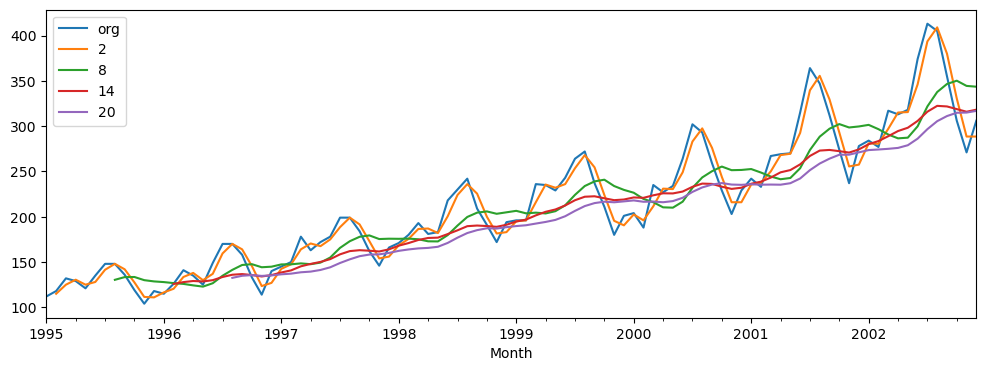

In [10]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

Time series decomposition plot

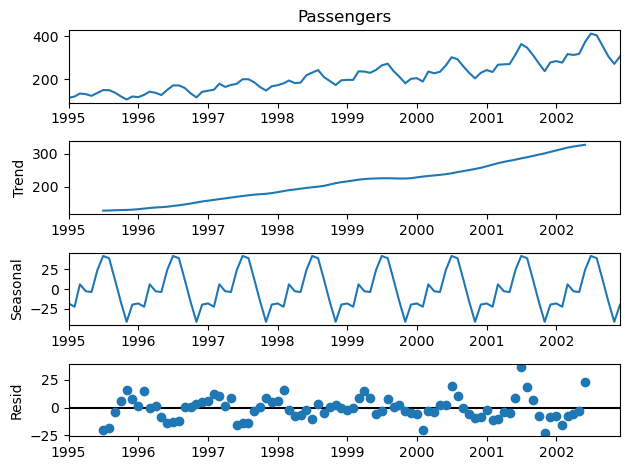

In [11]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show() 

ACF plots and PACF plots

C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


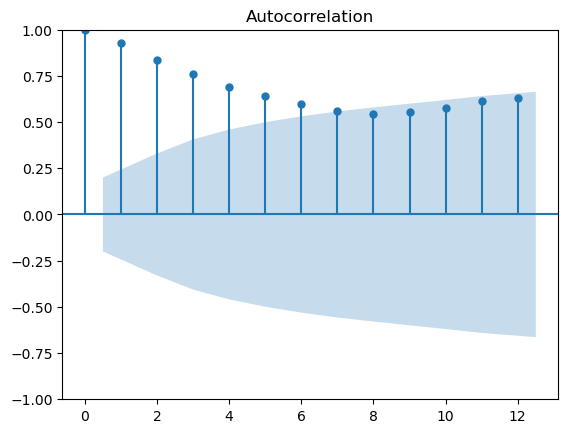

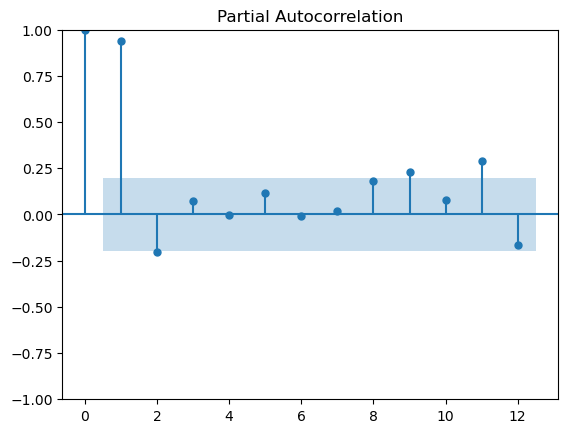

In [12]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

Simple Exponential Method

In [13]:
train["Passengers"] = train["Passengers"].astype('double') 
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])


rmse_ses = sqrt(mean_squared_error(test['Passengers'], pred_ses))
print(f'SimpleExpSmoothing RMSE: {rmse_ses}')

SimpleExpSmoothing RMSE: 50.85821662656347


C:\Users\user\AppData\Local\Temp\ipykernel_7032\3378816420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Passengers"] = train["Passengers"].astype('double')
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Holt method

In [14]:
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])

rmse_holt = sqrt(mean_squared_error(test['Passengers'], pred_hw))
print(f'Holt RMSE: {rmse_holt}')

Holt RMSE: 169.3651751827827


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Temp\ipykernel_7032\1182467554.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


Holts winter exponential smoothing with additive seasonality and additive trend

In [15]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])


rmse_hwe_add_add = sqrt(mean_squared_error(test['Passengers'], pred_hwe_add_add))
print(f'Holt winter add add  RMSE: {rmse_hwe_add_add}')

Holt winter add add  RMSE: 26.088263377210858


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [16]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])


rmse_hwe_mul_add = sqrt(mean_squared_error(test['Passengers'], pred_hwe_mul_add))
print(f'Holt winter mul add  RMSE: {rmse_hwe_mul_add}')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Holt winter mul add  RMSE: 14.570952789956896


In [17]:
import pandas as pd
rmse_values = {
    'ARIMA': rmse_arima,
    'SARIMA': rmse_sarima,
    'SES': rmse_ses,
    'Holt': rmse_holt,
    'Holt we_add_add': rmse_hwe_add_add,
    'Holt we_mul_add': rmse_hwe_mul_add
}

rmse_df = pd.DataFrame(list(rmse_values.items()), columns=['Model', 'RMSE'])
print(rmse_df)


             Model        RMSE
0            ARIMA   54.234010
1           SARIMA   15.052166
2              SES   50.858217
3             Holt  169.365175
4  Holt we_add_add   26.088263
5  Holt we_mul_add   14.570953


# Holts winter exponential smoothing with multiplicative seasonality and additive trend has lowest RMSE value which is 14.57.so i will use this model to forecast.

In [20]:
hwe_model_mul_add = ExponentialSmoothing(data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
hwe_model_mul_add.forecast(10)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2003-01-01    312.899424
2003-02-01    308.171306
2003-03-01    355.532782
2003-04-01    345.769814
2003-05-01    345.696096
2003-06-01    392.470733
2003-07-01    436.501361
2003-08-01    429.859243
2003-09-01    380.172872
2003-10-01    332.317301
Freq: MS, dtype: float64